In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import libpysal
import scipy as sp
import mapclassify
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

/usr/local/lib/python3.8/dist-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
path_1 = '/home/jovyan/private/Thesis/nai_train_data/'
path_2 = '/home/jovyan/private/Thesis/Nai_spatial_block/'

In [3]:
train_gdf = gpd.read_file(path_1 + 'train_dataV3.shp')

spatial_blocks_gdf = gpd.read_file(path_2 + 'spatial_blocks.shp')

In [4]:
#check columns of all dataframes
for col in train_gdf.columns:
    print(col)

ORIG_FID
Dist_ATM
Dist_Banks
Dist_Clin
Dist_Col
Dist_ComC
Dist_Dump
Dist_Hosp
Dist_Indus
Dist_Kind
Dist_Marke
Dist_PlayG
Dist_Polic
Dist_Resta
Dist_River
Dist_Sch
Dist_Uni
NDVI
ZonalSt_Sl
building_c
height_m
area_in_me
bArea_m
bVol_m
bPer_m
bCoA_m
bFoF_m
bVFR_m
bCCo_m
bCor_m
bSqu_m
bERI_m
bElo_m
floor_area
ssbCCM_m
ssbCCD_m
mtbSWR_m
bOri_m
mtbAli_m
mtbNDi_m
libNCo_m
ldbPWL_m
ltbIBD_m
ltcBuA_m
stbSAl_m
nodeID_x_m
tcOri_x_m
sdcLAL_x_m
sdcArea_x_
sscCCo_x_m
sscERI_x_m
mtcWNe_x_m
mdcAre_x_m
licGDe_x_m
ltcWRB_x_m
sicCAR_x_m
sicFAR_x_m
stcSAl_x_m
ldkAre_m
ldkPer_m
lskCCo_m
lskERI_m
lskCWA_m
ltkOri_m
ltkWNB_m
likWBB_m
sdsLen_m
sdsSPW_m
sdsSPH_m
sdsSPR_m
sdsSPO_m
sdsSWD_m
sdsSHD_m
sssLin_m
sdsAre_m
sisBpM_m
misRea_m
mdsAre_m
ldsMSL_m
ldsRea_m
mtdDeg_m
lcdMes_m
proportion
proporti_1
proporti_2
local_clos
ldsCDL_m
xcnSCl_m
mtdMDi_m
lddNDe_m
linWID_m
lddRea_m
lddARe_m
sddAre_m
midRea_m
midAre_m
bArea_Gini
bArea_Shan
bArea_Simp
bArea_Thei
sdcArea_Gi
sdcArea_Sh
sdcArea_Si
sdcArea_Th
bPer_Gini_
bPer

In [30]:
# path_1 = '/home/jovyan/private/Thesis/nai_train_data/'
train_data_w_sb_gdf = gpd.read_file(path_1 + 'train_dataV3_w_sb.shp')
train_data_w_sb_gdf.head()

,Join_Count,TARGET_FID,ORIG_FID,Dist_ATM,Dist_Banks,Dist_Clin,Dist_Col,Dist_ComC,Dist_Dump,Dist_Hosp,...,bERI_Gini_,bERI_Shann,bERI_Simps,bERI_Theil,blg_densit,class,PageName,PageNumber,Set,geometry
0,1,0,31226,13152.90,4726.520,4925.44,16422.200,565.685,16924.80,3801.32,...,0.017469,0.507985,0.699082,0.002039,0.0014,0,C6,16,1,"POLYGON ((281883.509 9858865.525, 281783.509 9..."
1,1,1,35556,10632.00,2420.740,2580.70,14011.800,3255.760,14454.40,1486.61,...,0.015446,0.527425,0.705740,0.001028,0.0014,0,C5,15,1,"POLYGON ((279083.509 9857865.525, 278983.509 9..."
2,1,2,14894,1843.91,509.902,1486.61,984.886,1746.420,1100.00,1166.19,...,0.011864,0.371422,0.802572,0.001142,0.0002,0,B3,7,2,"POLYGON ((263083.509 9862565.525, 262983.509 9..."
3,1,3,3623,2376.97,447.214,2668.33,4741.310,6964.190,7810.25,2475.88,...,0.012713,0.480893,0.763273,0.001246,0.0007,0,B2,6,1,"POLYGON ((255183.509 9866265.525, 255083.509 9..."
4,1,4,36849,15305.60,6937.580,7130.92,18681.500,1200.000,19105.00,5966.57,...,0.009424,0.632054,0.672861,0.000482,0.0006,0,C6,16,1,"POLYGON ((283883.509 9857565.525, 283783.509 9..."


In [4]:
train_gdf.head(), train_gdf.crs, train_gdf.shape

(   ORIG_FID  Dist_ATM  Dist_Banks  Dist_Clin   Dist_Col  Dist_ComC  Dist_Dump  \
 0     31226  13152.90    4726.520    4925.44  16422.200    565.685   16924.80   
 1     35556  10632.00    2420.740    2580.70  14011.800   3255.760   14454.40   
 2     14894   1843.91     509.902    1486.61    984.886   1746.420    1100.00   
 3      3623   2376.97     447.214    2668.33   4741.310   6964.190    7810.25   
 4     36849  15305.60    6937.580    7130.92  18681.500   1200.000   19105.00   
 
    Dist_Hosp  Dist_Indus  Dist_Kind  ...  bSqu_Shann  bSqu_Simps  bSqu_Theil  \
 0    3801.32    5515.430  16056.200  ...    0.053395    0.978741    3.612261   
 1    1486.61    4396.590  13670.400  ...    0.000000    1.000000    2.415003   
 2    1166.19     707.107   1081.670  ...    0.000000    1.000000    3.876373   
 3    2475.88    2785.680    707.107  ...    0.067411    0.973232    3.584198   
 4    5966.57    7864.480  18324.000  ...    0.106935    0.957815    3.878873   
 
    bERI_Gini_  bE

In [5]:
spatial_blocks_gdf, spatial_blocks_gdf.crs, spatial_blocks_gdf.shape

(   PageName  PageNumber                                           geometry
 0        A2           1  POLYGON ((248155.194 9866692.566, 248155.194 9...
 1        A3           2  POLYGON ((256326.879 9866692.566, 256326.879 9...
 2        A4           3  POLYGON ((264498.565 9866692.566, 264498.565 9...
 3        B1           5  POLYGON ((239983.509 9861447.158, 239983.509 9...
 4        B2           6  POLYGON ((248155.194 9861447.158, 248155.194 9...
 5        B3           7  POLYGON ((256326.879 9861447.158, 256326.879 9...
 6        B4           8  POLYGON ((264498.565 9861447.158, 264498.565 9...
 7        B5           9  POLYGON ((272670.250 9861447.158, 272670.250 9...
 8        C1          11  POLYGON ((239983.509 9856201.749, 239983.509 9...
 9        C2          12  POLYGON ((248155.194 9856201.749, 248155.194 9...
 10       C3          13  POLYGON ((256326.879 9856201.749, 256326.879 9...
 11       C4          14  POLYGON ((264498.565 9856201.749, 264498.565 9...
 12       C5

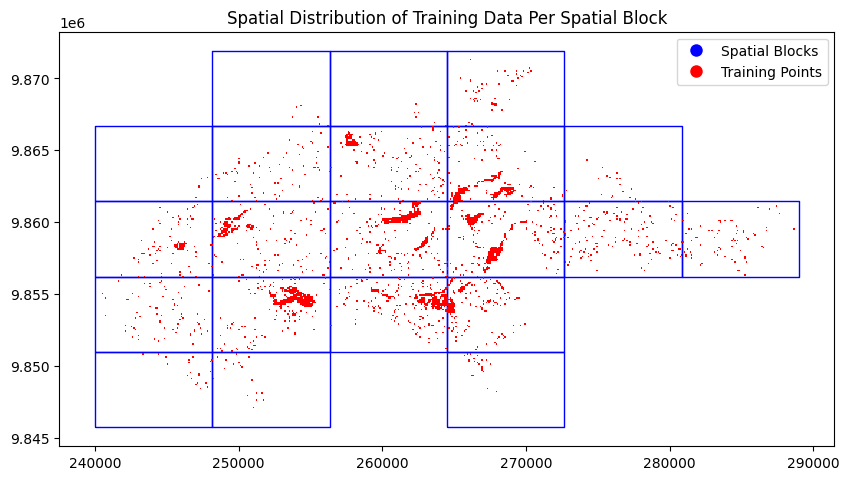

In [11]:
# Plot formal grids in blue and slum grids in red
fig, ax = plt.subplots(figsize=(10, 8))  # Set the figure size here

spatial_blocks_gdf.plot(ax=ax, facecolor='none', edgecolor='blue')
train_gdf.plot(ax=ax, color='red')


# Create custom legend handles
legend_handles = [
    Line2D([0], [0], marker='o', color='w', label='Spatial Blocks',
           markerfacecolor='blue', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Training Points',
           markerfacecolor='red', markersize=10)
]

# Add the custom legend to the plot
ax.legend(handles=legend_handles)

plt.title('Spatial Distribution of Training Data Per Spatial Block')

# Show the plot
plt.show()


In [7]:
# Assuming 'blocks_df' is your DataFrame containing the blocks
# Add a new column 'Set' to the DataFrame, initialized to 1 (train)
spatial_blocks_gdf['Set'] = 1

# Iterate over the rows and assign every third block to test (2)
for i in range(2, len(spatial_blocks_gdf), 3):
    spatial_blocks_gdf.loc[i, 'Set'] = 2

# Now, 'Set' column has 1 for training and 2 for test blocks
spatial_blocks_gdf

,PageName,PageNumber,geometry,Set
0,A2,1,"POLYGON ((248155.194 9866692.566, 248155.194 9...",1
1,A3,2,"POLYGON ((256326.879 9866692.566, 256326.879 9...",1
2,A4,3,"POLYGON ((264498.565 9866692.566, 264498.565 9...",2
3,B1,5,"POLYGON ((239983.509 9861447.158, 239983.509 9...",1
4,B2,6,"POLYGON ((248155.194 9861447.158, 248155.194 9...",1
5,B3,7,"POLYGON ((256326.879 9861447.158, 256326.879 9...",2
6,B4,8,"POLYGON ((264498.565 9861447.158, 264498.565 9...",1
7,B5,9,"POLYGON ((272670.250 9861447.158, 272670.250 9...",1
8,C1,11,"POLYGON ((239983.509 9856201.749, 239983.509 9...",2
9,C2,12,"POLYGON ((248155.194 9856201.749, 248155.194 9...",1


<AxesSubplot: >

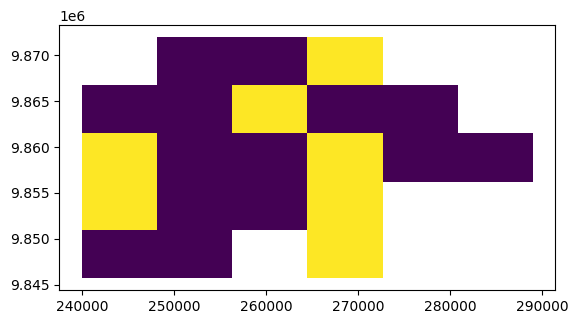

In [8]:
spatial_blocks_gdf.plot(column = 'Set')

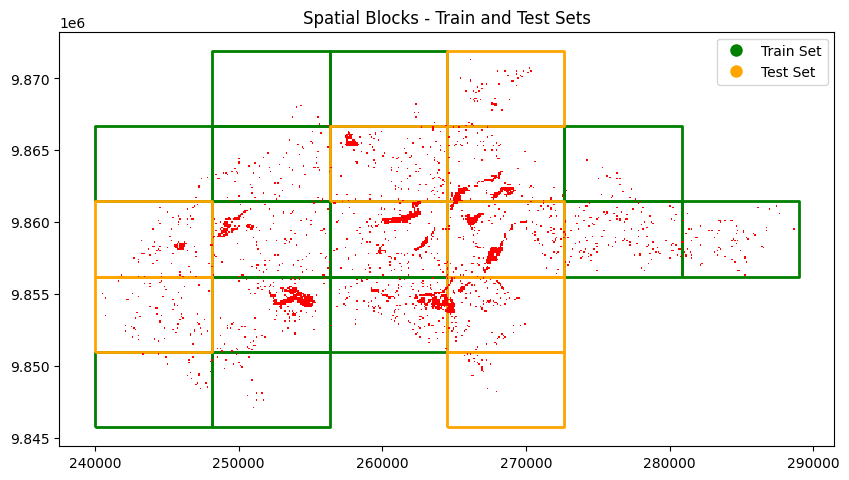

In [17]:
# Assuming 'blocks_gdf' is your GeoDataFrame and it includes a 'Set' column with values 1 and 2
# Separate the blocks into two GeoDataFrames based on the 'Set' column
train_blocks = spatial_blocks_gdf[spatial_blocks_gdf['Set'] == 1]
test_blocks = spatial_blocks_gdf[spatial_blocks_gdf['Set'] == 2]

# Create a plot with a transparent fill and different edge colors for the two sets
fig, ax = plt.subplots(figsize=(10, 8))
train_blocks.plot(ax=ax, edgecolor='green', facecolor='none', linewidth=2, label='Train Set')
test_blocks.plot(ax=ax, edgecolor='orange', facecolor='none', linewidth=2, label='Test Set')
train_gdf.plot(ax=ax, color='red')

# Add a legend to the plot
# Create custom legend handles
legend_handles = [
    Line2D([0], [0], marker='o', color='w', label='Train Set',
           markerfacecolor='green', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Test Set',
           markerfacecolor='orange', markersize=10)
    
]

# Add the custom legend to the plot
ax.legend(handles=legend_handles)
# Add title and axis labels as needed
plt.title('Spatial Blocks - Train and Test Sets')


# Show the plot
plt.show()


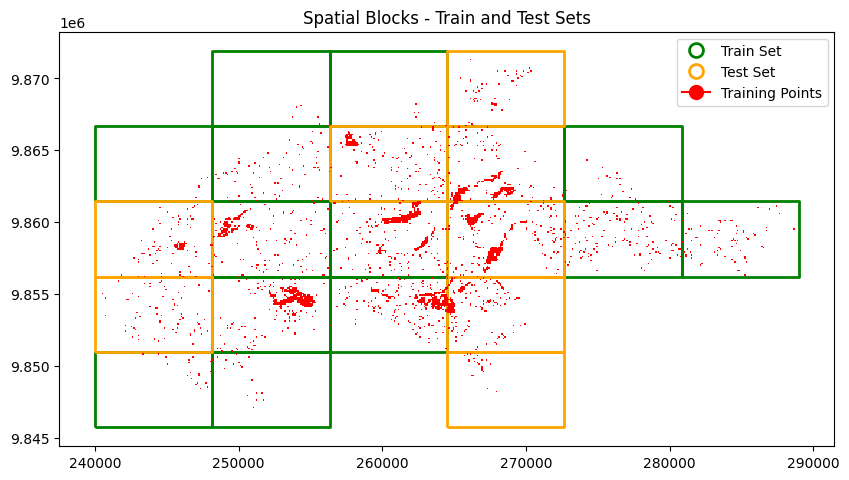

In [21]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Assuming 'spatial_blocks_gdf' is your GeoDataFrame and it includes a 'Set' column with values 1 and 2
# Separate the blocks into two GeoDataFrames based on the 'Set' column
train_blocks = spatial_blocks_gdf[spatial_blocks_gdf['Set'] == 1]
test_blocks = spatial_blocks_gdf[spatial_blocks_gdf['Set'] == 2]

# Create a plot with a transparent fill and different edge colors for the two sets
fig, ax = plt.subplots(figsize=(10, 8))
train_blocks.plot(ax=ax, edgecolor='green', facecolor='none', linewidth=2, label='Train Set')
test_blocks.plot(ax=ax, edgecolor='orange', facecolor='none', linewidth=2, label='Test Set')
train_gdf.plot(ax=ax, color='red')

# Create custom legend handles
legend_handles = [
    Line2D([0], [0], marker='o', color='w', markeredgecolor='green', label='Train Set',
           markerfacecolor='none', markersize=10, markeredgewidth=2),
    Line2D([0], [0], marker='o', color='w', markeredgecolor='orange', label='Test Set',
           markerfacecolor='none', markersize=10, markeredgewidth=2),
    Line2D([0], [0], marker='o', color='red', label='Training Points',
           markerfacecolor='red', markersize=10)
]

# Add the custom legend to the plot
ax.legend(handles=legend_handles)

# Add title and axis labels as needed
plt.title('Spatial Blocks - Train and Test Sets')

# Show the plot
plt.show()


In [22]:
spatial_blocks_gdf

,PageName,PageNumber,geometry,Set,Set_1
0,A2,1,"POLYGON ((248155.194 9866692.566, 248155.194 9...",1,1
1,A3,2,"POLYGON ((256326.879 9866692.566, 256326.879 9...",1,1
2,A4,3,"POLYGON ((264498.565 9866692.566, 264498.565 9...",2,2
3,B1,5,"POLYGON ((239983.509 9861447.158, 239983.509 9...",1,1
4,B2,6,"POLYGON ((248155.194 9861447.158, 248155.194 9...",1,2
5,B3,7,"POLYGON ((256326.879 9861447.158, 256326.879 9...",2,1
6,B4,8,"POLYGON ((264498.565 9861447.158, 264498.565 9...",1,2
7,B5,9,"POLYGON ((272670.250 9861447.158, 272670.250 9...",1,1
8,C1,11,"POLYGON ((239983.509 9856201.749, 239983.509 9...",2,2
9,C2,12,"POLYGON ((248155.194 9856201.749, 248155.194 9...",1,1


In [28]:
# Drop the specified columns
spatial_blocks_gdf = spatial_blocks_gdf.drop(columns=['Set_1'])
spatial_blocks_gdf

,PageName,PageNumber,geometry,Set
0,A2,1,"POLYGON ((248155.194 9866692.566, 248155.194 9...",1
1,A3,2,"POLYGON ((256326.879 9866692.566, 256326.879 9...",1
2,A4,3,"POLYGON ((264498.565 9866692.566, 264498.565 9...",2
3,B1,5,"POLYGON ((239983.509 9861447.158, 239983.509 9...",1
4,B2,6,"POLYGON ((248155.194 9861447.158, 248155.194 9...",1
5,B3,7,"POLYGON ((256326.879 9861447.158, 256326.879 9...",2
6,B4,8,"POLYGON ((264498.565 9861447.158, 264498.565 9...",1
7,B5,9,"POLYGON ((272670.250 9861447.158, 272670.250 9...",1
8,C1,11,"POLYGON ((239983.509 9856201.749, 239983.509 9...",2
9,C2,12,"POLYGON ((248155.194 9856201.749, 248155.194 9...",1


In [29]:
spatial_blocks_gdf.to_file(path_2 + 'spatial_blocks_6_6.shp')

In [25]:
# Perform a spatial join between spatial_blocks_gdf and train_gdf
spatial_blocks_gdf = gpd.sjoin(train_gdf, spatial_blocks_gdf, how='inner', op='intersects')

# Now 'joined_gdf' contains the training points with additional information from the spatial blocks
joined_gdf.head(), joined_gdf.shape

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3318: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


(    ORIG_FID  Dist_ATM  Dist_Banks  Dist_Clin  Dist_Col  Dist_ComC  Dist_Dump  \
 0      31226   13152.9     4726.52    4925.44   16422.2    565.685    16924.8   
 4      36849   15305.6     6937.58    7130.92   18681.5   1200.000    19105.0   
 9      22166   18100.0     9914.13   10111.90   21168.4   3744.330    21738.9   
 10     29888   14599.3     6203.23    6403.12   17827.2    640.312    18346.9   
 14     27580   13354.0     5008.99    5208.65   16556.0   1204.160    17083.9   
 
     Dist_Hosp  Dist_Indus  Dist_Kind  ...  bERI_Simps  bERI_Theil  blg_densit  \
 0     3801.32     5515.43    16056.2  ...    0.699082    0.002039      0.0014   
 4     5966.57     7864.48    18324.0  ...    0.672861    0.000482      0.0006   
 9     9100.55     9198.37    20778.1  ...    0.855170    0.000534      0.0008   
 10    5303.77     6489.99    17454.5  ...    0.624892    0.000385      0.0007   
 14    4159.33     5220.15    16180.5  ...    0.688463    0.001178      0.0001   
 
     class  

In [26]:
# Assuming 'joined_gdf' is the GeoDataFrame resulting from the spatial join
# Check for duplicate IDs in the 'train_gdf' column (assuming 'ID' is the ID column name)
duplicate_ids = joined_gdf['ORIG_FID'].duplicated(keep=False)

# Filter the joined GeoDataFrame to show only the duplicated IDs
duplicated_points = joined_gdf[duplicate_ids]

# Display the duplicated points (if any)
if not duplicated_points.empty:
    print("Duplicated IDs in train_gdf:")
    print(duplicated_points[['ORIG_FID', 'geometry']])
else:
    print("No duplicated IDs found in train_gdf.")


Duplicated IDs in train_gdf:
      ORIG_FID                                           geometry
96       36407  POLYGON ((280883.509 9857665.525, 280783.509 9...
215      32543  POLYGON ((280883.509 9858565.525, 280783.509 9...
24       31134  POLYGON ((272683.509 9858865.525, 272583.509 9...
63       19954  POLYGON ((278083.509 9861365.525, 277983.509 9...
96       36407  POLYGON ((280883.509 9857665.525, 280783.509 9...
...        ...                                                ...
2492     49090  POLYGON ((264583.509 9854165.525, 264483.509 9...
2524     49792  POLYGON ((264583.509 9853965.525, 264483.509 9...
2533     50139  POLYGON ((264583.509 9853865.525, 264483.509 9...
2540     50484  POLYGON ((264583.509 9853765.525, 264483.509 9...
2547     50829  POLYGON ((264583.509 9853665.525, 264483.509 9...

[102 rows x 2 columns]


<AxesSubplot: >

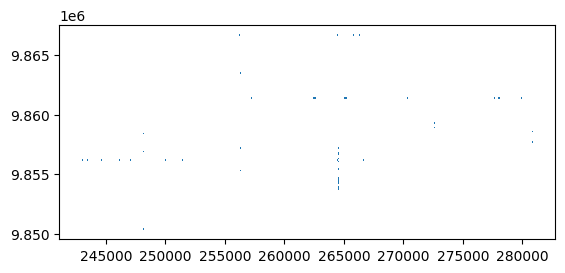

In [27]:
duplicated_points.plot()

<AxesSubplot: >

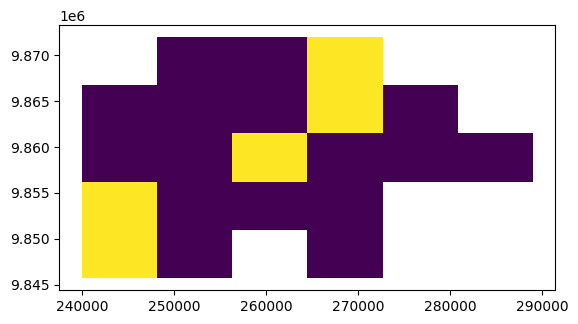

In [34]:
# Assuming 'blocks_df' is your DataFrame containing the blocks
# Add a new column 'Set' to the DataFrame, initialized to 1 (train)
spatial_blocks_gdf['Set'] = 1

# Iterate over the rows and assign every third block to test (2)
for i in range(2, len(spatial_blocks_gdf), 4):
    spatial_blocks_gdf.loc[i, 'Set'] = 2

# Now, 'Set' column has 1 for training and 2 for test blocks
spatial_blocks_gdf.plot(column = 'Set')

<AxesSubplot: >

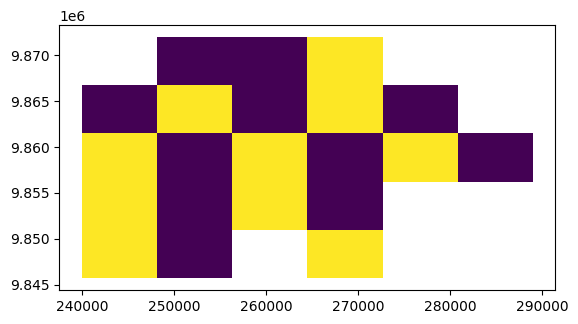

In [19]:
# Assuming 'blocks_df' is your DataFrame containing the blocks
# Add a new column 'Set' to the DataFrame, initialized to 1 (train)
spatial_blocks_gdf['Set_1'] = 1

# Iterate over the rows and assign every third block to test (2)
for i in range(2, len(spatial_blocks_gdf), 2):
    spatial_blocks_gdf.loc[i, 'Set_1'] = 2

# Now, 'Set' column has 1 for training and 2 for test blocks
spatial_blocks_gdf.plot(column = 'Set_1')

<AxesSubplot: >

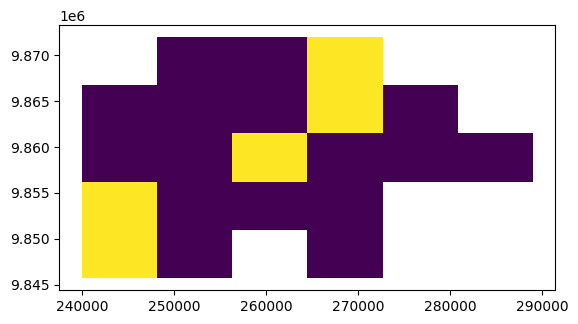

In [34]:
# Assuming 'blocks_df' is your DataFrame containing the blocks
# Add a new column 'Set' to the DataFrame, initialized to 1 (train)
spatial_blocks_gdf['Set'] = 1

# Iterate over the rows and assign every third block to test (2)
for i in range(2, len(spatial_blocks_gdf), 5):
    spatial_blocks_gdf.loc[i, 'Set'] = 2

# Now, 'Set' column has 1 for training and 2 for test blocks
spatial_blocks_gdf.plot(column = 'Set')

In [ ]:
train_data_w_sb_gdf

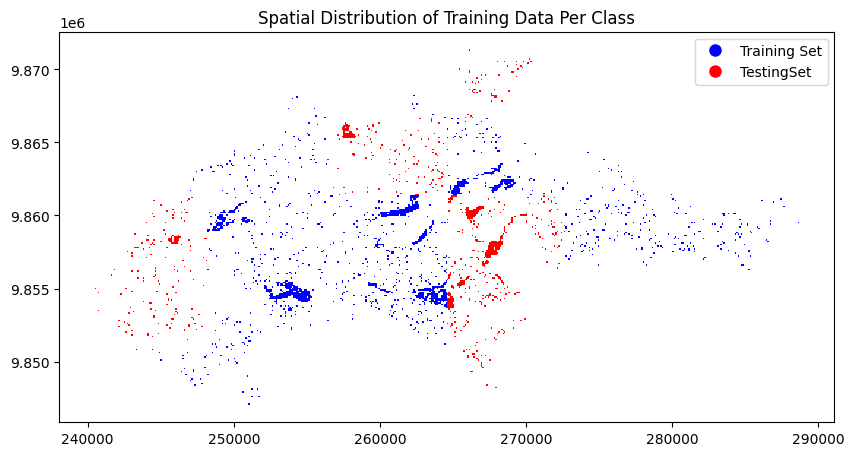

In [31]:
# Assuming 'gdf' is your GeoDataFrame
Train_Set = train_data_w_sb_gdf[train_data_w_sb_gdf['Set'] == 1]
Test_Set = train_data_w_sb_gdf[train_data_w_sb_gdf['Set'] == 2]

# Plot formal grids in blue and slum grids in red
fig, ax = plt.subplots(figsize=(10, 8))  # Set the figure size here

Train_Set.plot(ax=ax, color='blue')
Test_Set.plot(ax=ax, color='red')


# Create custom legend handles
legend_handles = [
    Line2D([0], [0], marker='o', color='w', label='Training Set',
           markerfacecolor='blue', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='TestingSet',
           markerfacecolor='red', markersize=10)
]

# Add the custom legend to the plot
ax.legend(handles=legend_handles)

plt.title('Spatial Distribution of Training Data Per Class')

# Show the plot
plt.show()


In [33]:
train_data_w_sb_gdf.columns 

Index(['Join_Count', 'TARGET_FID', 'ORIG_FID', 'Dist_ATM', 'Dist_Banks',
       'Dist_Clin', 'Dist_Col', 'Dist_ComC', 'Dist_Dump', 'Dist_Hosp',
       ...
       'bERI_Gini_', 'bERI_Shann', 'bERI_Simps', 'bERI_Theil', 'blg_densit',
       'class', 'PageName', 'PageNumber', 'Set', 'geometry'],
      dtype='object', length=124)

In [34]:
Train_Set.class.value_counts().plot.bar()

SyntaxError: invalid syntax (867723728.py, line 1)

In [ ]:
Train_Set.class.value_counts().plot.bar()

In [35]:
Train_Set

,Join_Count,TARGET_FID,ORIG_FID,Dist_ATM,Dist_Banks,Dist_Clin,Dist_Col,Dist_ComC,Dist_Dump,Dist_Hosp,...,bERI_Gini_,bERI_Shann,bERI_Simps,bERI_Theil,blg_densit,class,PageName,PageNumber,Set,geometry
0,1,0,31226,13152.900,4726.520,4925.440,16422.200,565.685,16924.800,3801.320,...,0.017469,0.507985,0.699082,0.002039,0.0014,0,C6,16,1,"POLYGON ((281883.509 9858865.525, 281783.509 9..."
1,1,1,35556,10632.000,2420.740,2580.700,14011.800,3255.760,14454.400,1486.610,...,0.015446,0.527425,0.705740,0.001028,0.0014,0,C5,15,1,"POLYGON ((279083.509 9857865.525, 278983.509 9..."
3,1,3,3623,2376.970,447.214,2668.330,4741.310,6964.190,7810.250,2475.880,...,0.012713,0.480893,0.763273,0.001246,0.0007,0,B2,6,1,"POLYGON ((255183.509 9866265.525, 255083.509 9..."
4,1,4,36849,15305.600,6937.580,7130.920,18681.500,1200.000,19105.000,5966.570,...,0.009424,0.632054,0.672861,0.000482,0.0006,0,C6,16,1,"POLYGON ((283883.509 9857565.525, 283783.509 9..."
5,1,5,5454,1204.160,921.954,943.398,2302.170,3982.460,4386.340,640.312,...,0.012501,0.574536,0.657669,0.000744,0.0007,0,B4,8,1,"POLYGON ((268283.509 9865365.525, 268183.509 9..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2554,1,2554,51068,412.311,1603.120,806.226,921.954,943.398,806.226,538.516,...,0.013003,0.922122,0.524035,0.001233,0.0074,1,D2,18,1,"POLYGON ((253883.509 9853565.525, 253783.509 9..."
2555,1,2555,51069,400.000,1503.330,824.621,1000.000,921.954,761.577,509.902,...,0.017150,1.041958,0.449976,0.001599,0.0058,1,D2,18,1,"POLYGON ((253983.509 9853565.525, 253883.509 9..."
2557,1,2557,51413,360.555,1627.880,894.427,921.954,984.886,894.427,500.000,...,0.021591,0.984512,0.460472,0.002571,0.0065,1,D2,18,1,"POLYGON ((253783.509 9853465.525, 253683.509 9..."
2558,1,2558,51414,316.228,1612.450,905.539,989.950,1029.560,894.427,447.214,...,0.017315,0.964311,0.489892,0.001580,0.0065,1,D2,18,1,"POLYGON ((253883.509 9853465.525, 253783.509 9..."


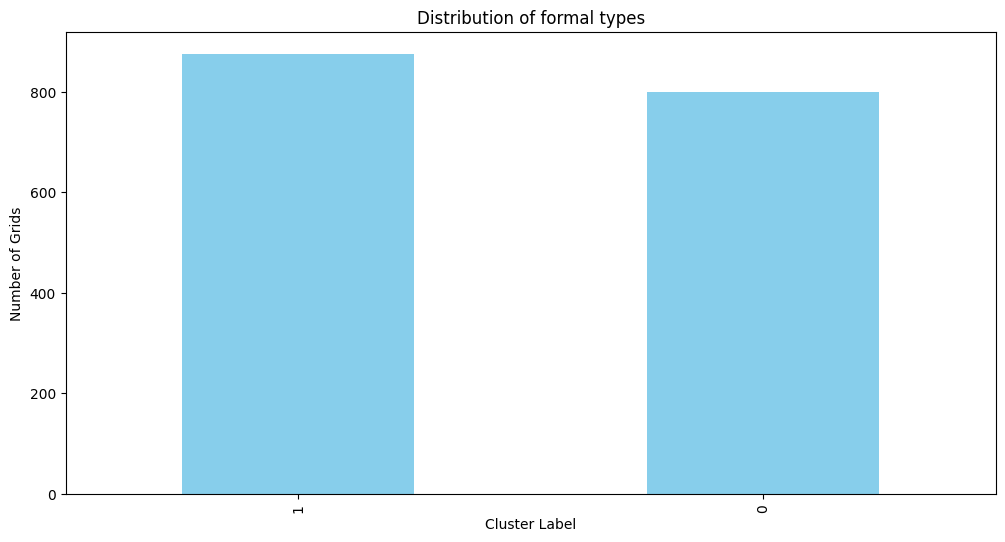

In [36]:
# Count the number of grids for each unique value in the 'NAME_2' column
counts_per_cluster = Train_Set['class'].value_counts()

# Create a bar chart for the distribution
counts_per_cluster.plot(kind='bar', color='skyblue', figsize=(12, 6))

# Add labels and title
plt.xlabel('Cluster Label')
plt.ylabel('Number of Grids')
plt.title('Distribution of formal types')

# Show the bar chart
plt.show()

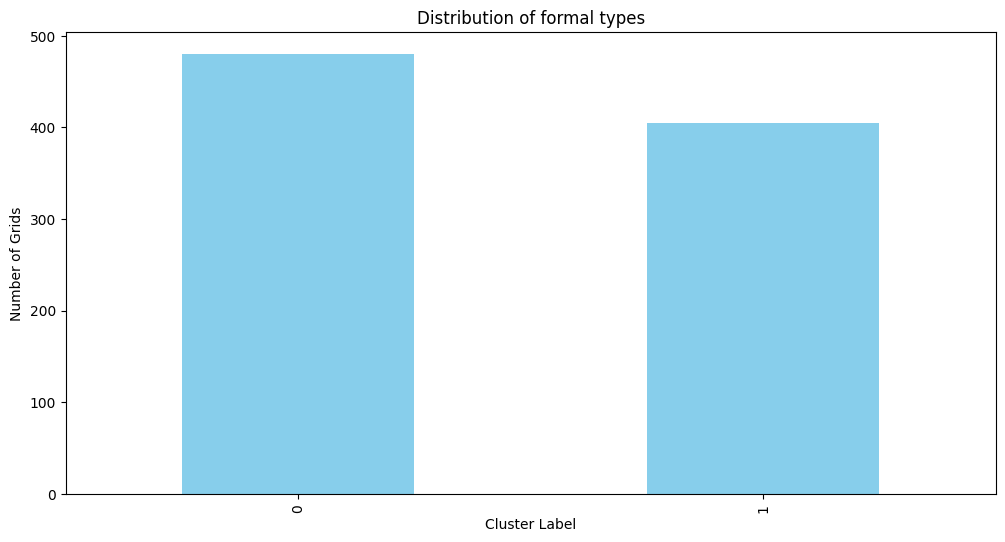

In [39]:
# Count the number of grids for each unique value in the 'NAME_2' column
counts_per_cluster = Test_Set['class'].value_counts()

# Create a bar chart for the distribution
counts_per_cluster.plot(kind='bar', color='skyblue', figsize=(12, 6))

# Add labels and title
plt.xlabel('Cluster Label')
plt.ylabel('Number of Grids')
plt.title('Distribution of formal types')

# Show the bar chart
plt.show()

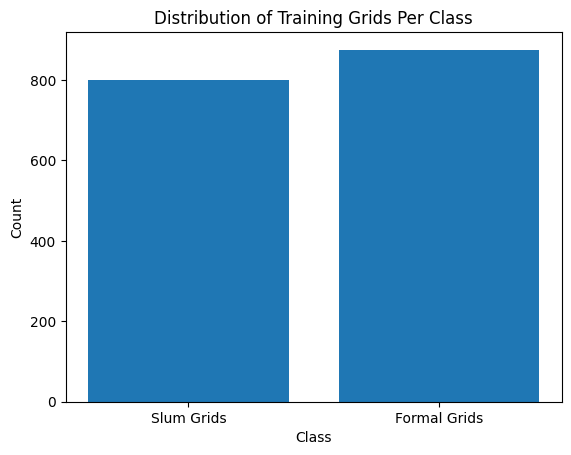

In [43]:
# Assuming 'df' is your DataFrame and it includes a 'class' column with 0s and 1s
class_counts = Train_Set['class'].value_counts()

# Create a bar plot
plt.bar(class_counts.index, class_counts.values)

# Set the labels for the x-axis to 'Formal Grids' and 'Slum Grids'
plt.xticks(class_counts.index, ['Formal Grids', 'Slum Grids'])

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Training Grids Per Class')

# Show the plot
plt.show()

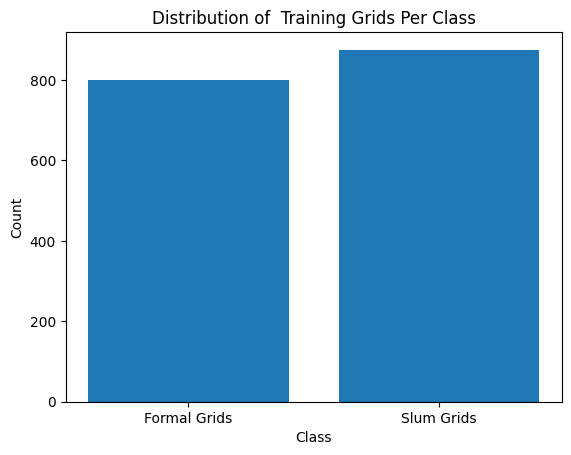

In [45]:
import matplotlib.pyplot as plt

# Assuming 'Train_Set' is your DataFrame and it includes a 'class' column with 0s and 1s
# Get the counts for each class
class_counts = Train_Set['class'].value_counts().sort_index()

# Create a bar plot
plt.bar(['Formal Grids', 'Slum Grids'], class_counts.values)

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of  Training Grids Per Class')

# Show the plot
plt.show()


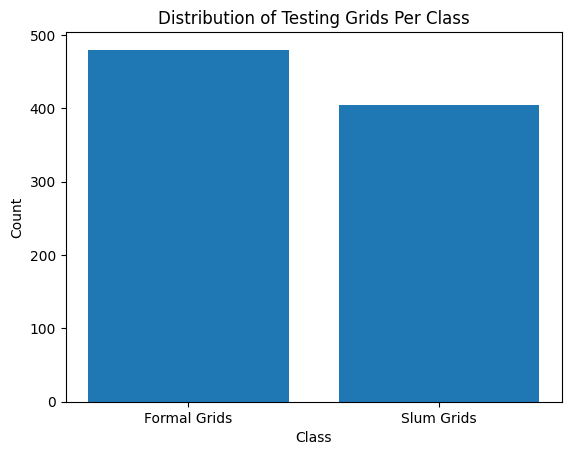

In [44]:
# Assuming 'df' is your DataFrame and it includes a 'class' column with 0s and 1s
class_counts = Test_Set['class'].value_counts()

# Create a bar plot
plt.bar(class_counts.index, class_counts.values)

# Set the labels for the x-axis to 'Formal Grids' and 'Slum Grids'
plt.xticks(class_counts.index, ['Formal Grids', 'Slum Grids'])

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Testing Grids Per Class')

# Show the plot
plt.show()

<AxesSubplot: >

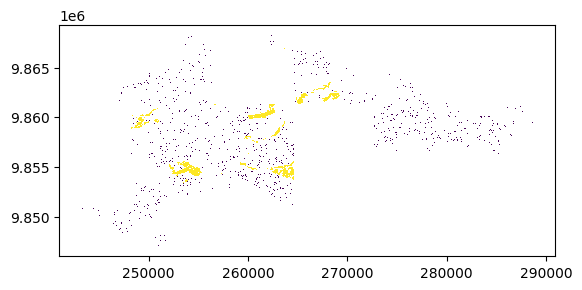

In [37]:
Train_Set.plot(column = 'class')

<AxesSubplot: >

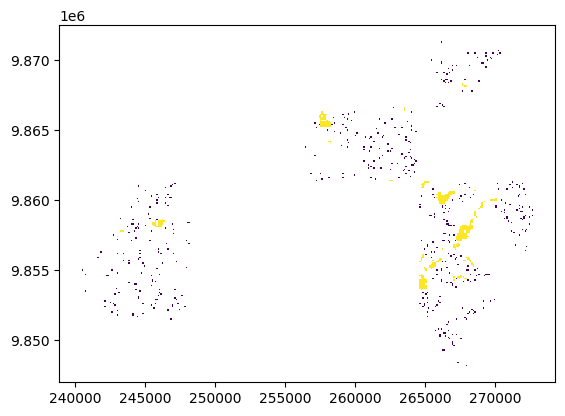

In [38]:
Test_Set.plot(column = 'class')

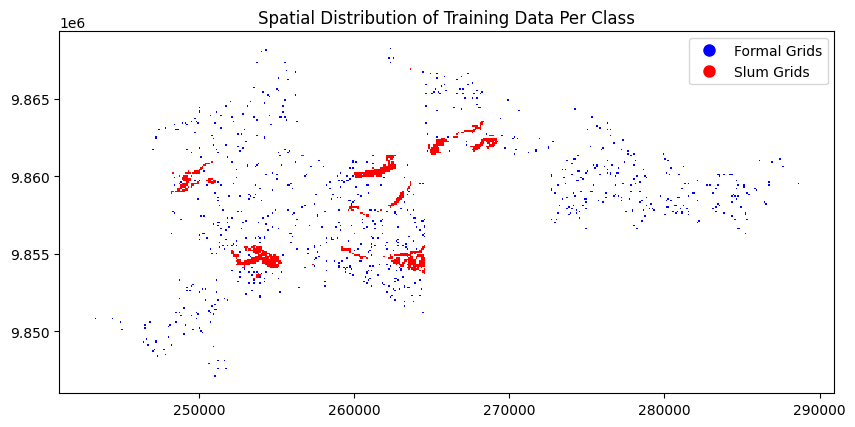

In [46]:
# Assuming 'gdf' is your GeoDataFrame
formal_grids = Train_Set[Train_Set['class'] == 0]
slum_grids = Train_Set[Train_Set['class'] == 1]

# Plot formal grids in blue and slum grids in red
fig, ax = plt.subplots(figsize=(10, 8))  # Set the figure size here

formal_grids.plot(ax=ax, color='blue')
slum_grids.plot(ax=ax, color='red')


# Create custom legend handles
legend_handles = [
    Line2D([0], [0], marker='o', color='w', label='Formal Grids',
           markerfacecolor='blue', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Slum Grids',
           markerfacecolor='red', markersize=10)
]

# Add the custom legend to the plot
ax.legend(handles=legend_handles)

plt.title('Spatial Distribution of Training Data Per Class')

# Show the plot
plt.show()

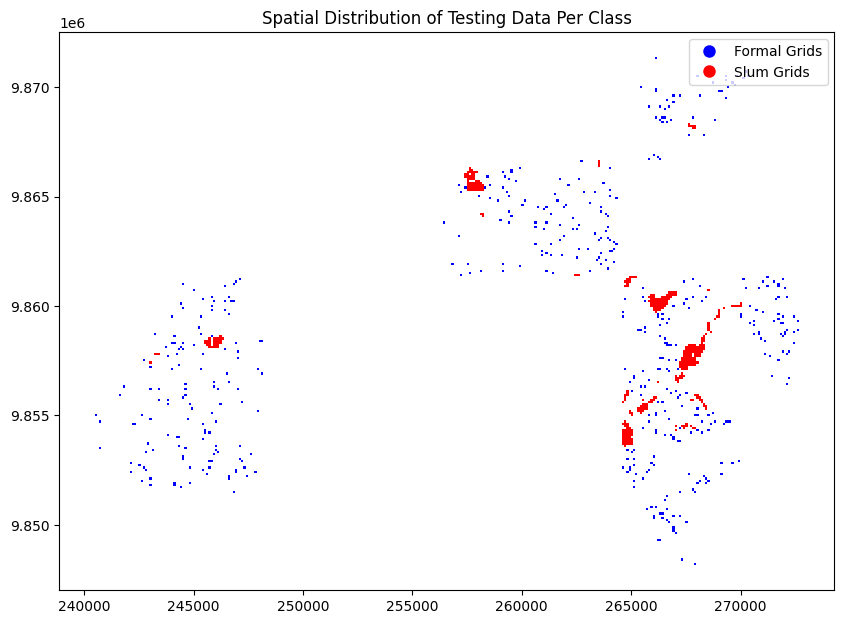

In [47]:
# Assuming 'gdf' is your GeoDataFrame
formal_grids = Test_Set[Test_Set['class'] == 0]
slum_grids = Test_Set[Test_Set['class'] == 1]

# Plot formal grids in blue and slum grids in red
fig, ax = plt.subplots(figsize=(10, 8))  # Set the figure size here

formal_grids.plot(ax=ax, color='blue')
slum_grids.plot(ax=ax, color='red')


# Create custom legend handles
legend_handles = [
    Line2D([0], [0], marker='o', color='w', label='Formal Grids',
           markerfacecolor='blue', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Slum Grids',
           markerfacecolor='red', markersize=10)
]

# Add the custom legend to the plot
ax.legend(handles=legend_handles)

plt.title('Spatial Distribution of Testing Data Per Class')

# Show the plot
plt.show()

In [48]:
Train_Set.to_file(path_1 + 'train_dataV4.shp')

In [49]:
Test_Set.to_file(path_1 + 'test_dataV4.shp')